# Simple ML introducion

Written by:
- Manuel Szewc (School of Physics, University of Cincinnati)
- Philip Ilten (School of Physics, University of Cincinnati)
$\renewcommand{\gtrsim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{>}{\sim}$\hspace{1mm}}}\renewcommand{\lessim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{<}{\sim}$\hspace{1mm}}}\renewcommand{\as}{\alpha_{\mathrm{s}}}\renewcommand{\aem}{\alpha_{\mathrm{em}}}\renewcommand{\kT}{k_{\perp}}\renewcommand{\pT}{p_{\perp}}\renewcommand{\pTs}{p^2_{\perp}}\renewcommand{\pTe}{\p_{\perp\mrm{evol}}}\renewcommand{\pTse}{\p^2_{\perp\mrm{evol}}}\renewcommand{\pTmin}{p_{\perp\mathrm{min}}}\renewcommand{\pTsmim}{p^2_{\perp\mathrm{min}}}\renewcommand{\pTmax}{p_{\perp\mathrm{max}}}\renewcommand{\pTsmax}{p^2_{\perp\mathrm{max}}}\renewcommand{\pTL}{p_{\perp\mathrm{L}}}\renewcommand{\pTD}{p_{\perp\mathrm{D}}}\renewcommand{\pTA}{p_{\perp\mathrm{A}}}\renewcommand{\pTsL}{p^2_{\perp\mathrm{L}}}\renewcommand{\pTsD}{p^2_{\perp\mathrm{D}}}\renewcommand{\pTsA}{p^2_{\perp\mathrm{A}}}\renewcommand{\pTo}{p_{\perp 0}}\renewcommand{\shat}{\hat{s}}\renewcommand{\a}{{\mathrm a}}\renewcommand{\b}{{\mathrm b}}\renewcommand{\c}{{\mathrm c}}\renewcommand{\d}{{\mathrm d}}\renewcommand{\e}{{\mathrm e}}\renewcommand{\f}{{\mathrm f}}\renewcommand{\g}{{\mathrm g}}\renewcommand{\hrm}{{\mathrm h}}\renewcommand{\lrm}{{\mathrm l}}\renewcommand{\n}{{\mathrm n}}\renewcommand{\p}{{\mathrm p}}\renewcommand{\q}{{\mathrm q}}\renewcommand{\s}{{\mathrm s}}\renewcommand{\t}{{\mathrm t}}\renewcommand{\u}{{\mathrm u}}\renewcommand{\A}{{\mathrm A}}\renewcommand{\B}{{\mathrm B}}\renewcommand{\D}{{\mathrm D}}\renewcommand{\F}{{\mathrm F}}\renewcommand{\H}{{\mathrm H}}\renewcommand{\J}{{\mathrm J}}\renewcommand{\K}{{\mathrm K}}\renewcommand{\L}{{\mathrm L}}\renewcommand{\Q}{{\mathrm Q}}\renewcommand{\R}{{\mathrm R}}\renewcommand{\T}{{\mathrm T}}\renewcommand{\W}{{\mathrm W}}\renewcommand{\Z}{{\mathrm Z}}\renewcommand{\bbar}{\overline{\mathrm b}}\renewcommand{\cbar}{\overline{\mathrm c}}\renewcommand{\dbar}{\overline{\mathrm d}}\renewcommand{\fbar}{\overline{\mathrm f}}\renewcommand{\pbar}{\overline{\mathrm p}}\renewcommand{\qbar}{\overline{\mathrm q}}\renewcommand{\rbar}{\overline{\mathrm{r}}}\renewcommand{\sbar}{\overline{\mathrm s}}\renewcommand{\tbar}{\overline{\mathrm t}}\renewcommand{\ubar}{\overline{\mathrm u}}\renewcommand{\Bbar}{\overline{\mathrm B}}\renewcommand{\Fbar}{\overline{\mathrm F}}\renewcommand{\Qbar}{\overline{\mathrm Q}}\renewcommand{\tms}{{t_{\mathrm{\tiny MS}}}}\renewcommand{\Oas}[1]{{\mathcal{O}\left(\as^{#1}\right)}}$

## Introduction

This notebook wants to implement simple Machine Learning algorithms

In [1]:
import os

# To generate data and handle arrays
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Classification

Estamos interesandos en problemas de clasificación en el que queremos aprender a asignar una clase $\mathcal{C}_{k}$ a un dato $x$ teniendo como datos de entrenamiento un conjunto etiquetado $x_{\text{train}},t_{\text{train}}$

La clase pasada vimos el **Perceptron**. Este clasificador nos provee una **función discriminante** $y(x,w)$ que separa a las clases. Es decir, $y$ tiene incluida una decisión sobre la clase a la que pertenece $x$.

Hoy vamos a ver un enfoque **discriminativo**. Nuestro modelo busca aprender

$$p(\mathcal{C}_{k}|x)$$

En este enfoque no intentamos modelar priors, verosimilitud y evidencia. Nos concentramos directamente en el **posterior**. Ahora, nuestra función $y(x,w)$ decide automaticamente la clase a la que pertenece $x$. Con el posterior a mano, tenemos que implementar la **teoría de la decisión** para asignar un valor de $t$.

Para el problema binario, sólo necesitamos modelar $p(\mathcal{C}_{1}|x)$ ya que $p(\mathcal{C}_{2}|x)=1-p(\mathcal{C}_{1}|x)$. Para el problema multiclase, si necesitamos modelar las $K$ distribuciones posteriores.

Para el caso binario, podemos hacer la siguiente cuenta

$$p(\mathcal{C}_{1}|x)=\frac{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})+p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}=\frac{1}{1+\frac{p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}}$$

Si tomamos $a=\text{Ln }\frac{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}{p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}$

$$p(\mathcal{C}_{1}|x)=\frac{1}{1+\text{e}^{-a}}=\sigma(a)$$

$\sigma(a)$ es la **función sigmoide**.

Si inspeccionamos $a$ un poco mas, vemos que 

$$a=\text{Ln }\frac{p(x|\mathcal{C}_{1})p(\mathcal{C}_{1})}{p(x|\mathcal{C}_{2})p(\mathcal{C}_{2})}=\text{Ln }\frac{p(\mathcal{C}_{1}|x)}{p(\mathcal{C}_{2}|x)}$$

es el logaritmo del cociente entre probabilidades. Entonces, utilizando la sigmoide, podemos prescindir de la verosimilitud y del prior, considerando unicamente los posteriores.

Text(0.5, 0, 'Log odds')

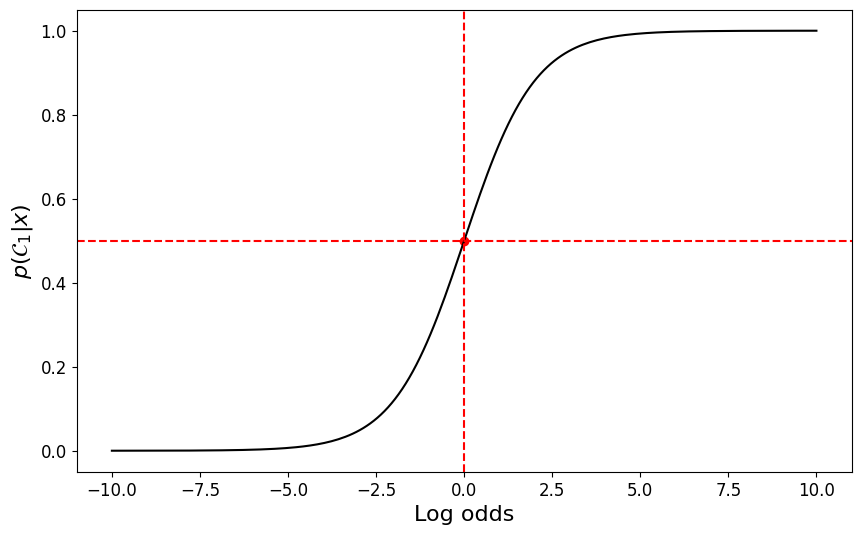

In [39]:
prob = np.linspace(-10, 10, 200)

a_vals = 1 / (1 + np.exp(-prob))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(prob, a_vals, color='black')
ax.scatter(0.0, 0.5, color='red')
ax.axvline(0.0, linestyle="dashed",color='red')
ax.axhline(0.5, linestyle="dashed",color='red')
ax.set_ylabel(r'$p(\mathcal{C}_{1}|x)$', fontsize=16)
ax.set_xlabel('Log odds', fontsize=16)

Vemos que si bien el cociente de probabilidades toma valores entre $-\infty$ y $\infty$, la función sigmoide tiene valores entre 0 y 1, que puede interpretarse como una probabilidad.

En particular, cuando el cociente de probabilidades da uno, la sigmoide da 0.5 (como tiene que dar!).

La sigmoide tiene dos propiedades útiles:

$$\sigma(-a)=1-\sigma(a)$$

y

$$\frac{d\sigma}{da}=\sigma(1-\sigma)$$


Para el caso de K clases, consideramos la siguiente generalización

$$p(\mathcal{C}_{k}|x)=\frac{p(x|\mathcal{C}_{k})p(\mathcal{C}_{k})}{\sum_{l=1}^{K}p(x|\mathcal{C}_{l})p(\mathcal{C}_{l})}=\frac{e^{a_{k}}}{\sum_{l=1}^{K}e^{a_{l}}}$$

con $a_{k}=\text{Ln }p(x|\mathcal{C}_{k})p(\mathcal{C}_{k})$

Esta función se conoce como la exponencial normalizada o **softmax**.


**Regresión Logística**

Vamos a considerar ahora la **Regresión Logística**. Para dos clases, modelamos el posterior como

$$p(\mathcal{C}_{1}|\vec{x})=y(\vec{x},\vec{w})=\sigma(\vec{w}^{T}\vec{\phi}(\vec{x}))$$

Fijense como, al igual que para el Perceptron, introducimos una función de activación no lineal. Sin embargo, esta función de activación es distinta y garantiza que obtengamos un número entre 0 y 1, tal como debe ser una probabilidad. Que utilicemos la sigmoide para lograrlo esta motivado en el truco que vimos en la sección anterior pero es ahora una elección de modelado, no un resultado de hacer inferencia.

Acá $\vec{\phi}$ vuelve a incluir $\phi_{0}(\vec{x})=1$.

Para muchos datos, agrupo

$$\Phi=\begin{pmatrix}\vec{\phi}^{T}(\vec{x}_{1}) \\ ... \\ \vec{\phi}^{T}(\vec{x}_{N})\end{pmatrix}$$

$\sigma(\Phi\cdot \vec{w}) = \begin{pmatrix}\sigma(\vec{\phi}^{T}(\vec{x}_{1}) \cdot\vec{w})\\ ... \\ \sigma(\vec{\phi}^{T}(\vec{x}_{N})\cdot\vec{w})\end{pmatrix}=\begin{pmatrix}\sigma((\vec{w}^{T} \cdot\vec{\phi}(\vec{x}_{1}))^T)\\ ... \\ \sigma((\vec{w}^{T} \cdot\vec{\phi}(\vec{x}_{N}))^T)\end{pmatrix}=\begin{pmatrix}y(\vec{x}_{1},\vec{w})\\ ... \\ y(\vec{x}_{N},\vec{w})\end{pmatrix}$

Necesitamos decidir la función de error adecuada para el problema y definir un algoritmo para minimizar dicha función.

Podemos encontrarla como hicimos para fundamentar cuadrados mínimos: escribiendo la verosimilitud.

$t$ es una variable binaria, con valores exito o fracaso. 
Para una única medición, la verosimilitud $p(\text{t}|\vec{x},\vec{w})$ es entonces una Bernoulli $p(t|\mu)=\mu^{t}(1-\mu)^{1-t}$ con $\mu$ la probabilidad de éxito. ¿Cuál es dicha probabilidad de éxito? Justamente es lo que queremos obtener, $p(\mathcal{C}_{1}|\vec{x})=y(\vec{x},\vec{w})$.

Entonces para un dataset $\vec{x}_{n}$, con $n=1,..,N$ la verosimilitud es

$p(\text{T}|X,\vec{w})=\prod_{n=1}^{N}y^{t_n}_{n}(1-y_{n})^{1-t_n}$

donde $y_{n}=y(x_{n},\vec{w})$. Tomando el el logaritmo

$\text{Ln }p(\text{T}|\vec{w})=\sum_{n=1}^{N}(t_{n}\text{Ln }y_{n}+(1-t_{n})\text{Ln }(1-y_{n}))$

Aplicando un signo menos, llegamos a la función de error que nos interesa, y que vamos a usar muchisimo: la entropía cruzada o **cross-entropy**

$$E(\vec{w})=-\sum_{n=1}^{N}(t_{n}\text{ln}y_{n}+(1-t_{n})\text{ln}(1-y_{n}))$$

Dado que $t_{n}=\{0,1\}$, la función de error hace lo siguiente

Si $t_{n}=1$, tiene en cuenta $\text{Ln }y_{n}$. Entonces, $y_{n}$ tiene que ser cercano a 1 para minimizar el error.

Si $t_{n}=0$, tiene en cuenta $\text{Ln }1-y_{n}$. Entonces, $y_{n}$ tiene que ser cercano a 0 para minimizar el error.

Es decir, hace lo que tiene que hacer. Recordemos que $y_{n}$ no es $t_{n}$ sino que es $p(t_{n}|\vec{x}_{n},\vec{w})$.

Minimizar esta función de error es más díficil que minimizar la de cuadrados mínimos debido a la presencia de los logaritmos. Sin embargo, podemos definir un algoritmo iterativo para encontrar los $\vec{w}$, el Iterative Reweighted Least Squares o IRLS. Este algoritmo utiliza una actualización de Newton-Ralphson:

$\vec{w}^{\text{nuevo}}=\vec{w}^{\text{viejo}}-\text{H}^{-1}\nabla E(\vec{w})$

Donde $\nabla E(\vec{w})$ es el gradiente del error y $\text{H}$ es la matriz Hessiana. Para la regresión logística, uno puede llegar a sus propias ecuaciones normales _iterativas_ aprovechando las propiedades de la sigmoide

$\vec{w}^{\text{nuevo}}=(\text{$\Phi$}^{T}\text{R}\text{$\Phi$})^{-1}\text{$\Phi$}^{T}\text{R}\text{z}$

Con $\Phi$ la matriz de diseño, $\text{R}$ la matriz diagonal cuyos elementos son $y_{n}(1-y_{n})$ y $\text{z}$ es un vector que se calcula como:

$\text{z}=\text{$\Phi$}\vec{w}^{\text{viejo}}-\text{R}^{-1}(\text{Y}-\text{T})$

Con $\text{Y}$ e $\text{T}$ los vectores de predicciones y respuestas respectivamente. Noten que los pesos entran varias veces: en la matriz $\text{R}$, en el vector $\text{Y}$ y explicitamente en $\text{z}$. Es por esto que es iterativo.


Este algoritmo también puede aplicarse al caso de regresión lineal, viendo que el algoritmo de Newton-Raphson converge a la solución cerrada en 1 paso. La diferencia acá es la función de activación sigmoide. Además, quiero enfatizar que este algoritmo es iterativo pero no es secuencial, ya que utiliza todos los datos del dataset.

Como mencionamos la clase pasada, y vamos a ver en detalle la clase que viene, necesitamos decidir cuando asignar una medición a una clase.

Para el caso binario, podemos tomar el criterio que $x\in\mathcal{C}_1$ si

$$p(\mathcal{C}_{1}|x)\geq p(\mathcal{C}_{2}|x)$$

Dado que tenemos probabilidades que suman uno, este criterio pone la **frontera de decisión** en

$$p(\mathcal{C}_{1}|x)=0.5$$

Puede mostrarse que esta elección de frontera de decisión maximiza la **exactitud** o **accuracy**

$$\text{Exactitud = }\frac{\text{VP}+\text{VN}}{\text{VP}+\text{FP}+\text{VN}+\text{FN}}$$

Es decir, minimizamos la cantidad de **errores totales** (que no es lo mismo que minimizar la entropía cruzada).



In [71]:
size1 = 250
mu1 = [0, 0]
cov1 = [[1, 0.95],[0.95, 1]]

size2 = 200
mu2 = [-3, 0.5]
cov2 = [[1, 0.8],[0.8, 1]]

np.random.seed(20200922)
# Sample classes
xc1 = np.random.multivariate_normal(mean=mu1, cov=cov1,size=size1).T
xc2 = np.random.multivariate_normal(mean=mu2, cov=cov2,size=size2).T

print(xc1.shape, xc2.shape)

(2, 250) (2, 200)


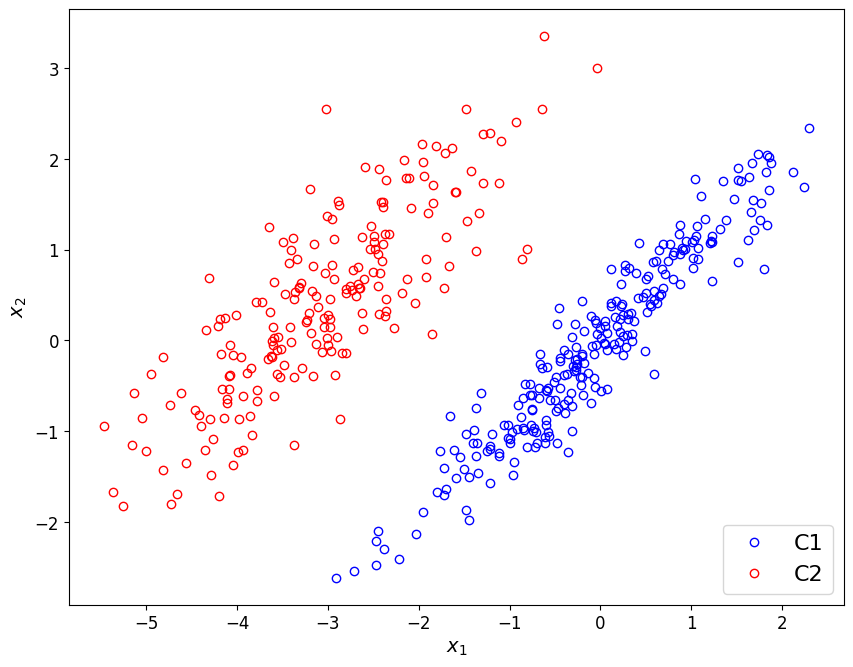

In [72]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

In [73]:
X = np.hstack([xc1, xc2]).T

tc1 = np.ones(xc1.shape[1])
tc2 = np.zeros(xc2.shape[1])

t = np.concatenate([tc1, tc2]).reshape(-1,1)

In [74]:
def sigmoid(logoddsvec):
    return 1/(1+np.exp(-logoddsvec))

In [75]:
Phi=np.hstack([np.ones(len(X)).reshape(-1,1), X])# matriz de diseño
#print(Phi.shape)
w=[np.ones(3).reshape(-1,1)]#inicializo los pesos
n_iter = 13 #defino el numero de iteraciones con el que voy a jugar
for i in range(n_iter):
  # obtengo los ys iniciales utilizando mis pesos, la matriz de diseño y la funcion de activacion
  y = sigmoid(np.dot(Phi, w[-1]))
  #print(y.shape)
  #R=np.diag(list(map(lambda yy: yy*(1-yy), y[:,0])))#matriz R
  R = np.diag(y[:,0]*(1-y[:,0]))#matriz R
  #print(R.shape)
  aux_matrix = np.linalg.solve(R,(y-t)) #paso auxiliar necesario
  z = np.dot(Phi,w[-1])-aux_matrix #matriz z
  aux_matrix_2 = np.dot(np.dot(Phi.T,R),Phi)
  aux_matrix_3 = np.dot(np.dot(Phi.T,R),z)
  w_aux=np.linalg.solve(aux_matrix_2,aux_matrix_3)
  if(1==1):#criterio de convergencia
    w.append(w_aux)
  else:
    break

Veamos como evolucionan los coeficientes

In [76]:
for w_val in w:
  print(w_val[:,0])

[1. 1. 1.]
[ 2.4404682   1.26402509 -1.91375055]
[ 3.45644332  1.96420953 -2.39061501]
[ 4.46892371  2.6750064  -3.00473299]
[ 5.50669428  3.44641528 -3.73743344]
[ 6.61784433  4.32475323 -4.6323189 ]
[ 7.88477088  5.36036928 -5.7345491 ]
[ 9.37809813  6.57649456 -7.04746665]
[11.11205601  7.95937618 -8.54144841]
[ 13.0623738    9.48246387 -10.18259107]
[ 15.18849171  11.11782682 -11.93793296]
[ 17.44722581  12.83904863 -13.7777448 ]
[ 19.80222713  14.62424842 -15.67896909]
[ 22.22681816  16.4571953  -17.6254591 ]


In [77]:
W = w[-1]
y = sigmoid(np.dot(Phi,W))

# Clasifico como 1 los casos que tienen P(c1 | x) >= 0.5
y_pred = np.where(y>=0.5, 1, 0)


In [78]:
TP = np.sum(t[np.where(y_pred[:,0]==1), 0])
FP = np.sum(1-t[np.where(y_pred[:,0]==1), 0])
TN = np.sum(1-t[np.where(y_pred[:,0]==0), 0])
FN = np.sum(t[np.where(y_pred[:,0]==0), 0])

print(TP, FP, TN, FN)
print((VP+VN)/(VP+FP+VN+FN))

250.0 0.0 200.0 0.0
1.0


In [79]:
def accuracy_score(labels,predictions):
    return np.mean(np.allclose(labels,predictions))

In [80]:
accuracy_score(t,y_pred)

np.float64(1.0)

Otra herramienta invaluable, y que vamos a explorar la clase que viene, es la matriz de confusión. Esta matriz tiene como elemento i-j la cantidad de elementos de la clase i asignados al grupo j.

In [81]:
def confusion_matrix(labels,predictions):
    #  pred0 pred1
    #verdad0  VN  FP
    #verdad1  FN  VP
    TP = np.sum(labels[np.where(predictions[:,0]==1), 0])
    FP = np.sum(1-labels[np.where(predictions[:,0]==1), 0])
    TN = np.sum(1-labels[np.where(predictions[:,0]==0), 0])
    FN = np.sum(labels[np.where(predictions[:,0]==0), 0])
    return np.array([[TN,FP],[FN,TP]])

In [83]:
cf = confusion_matrix(t,y_pred)
print(cf)

[[200.   0.]
 [  0. 250.]]


In [84]:
TN,FP,FN,TP = cf.ravel() 
print(TP,FP,TN,FN)

250.0 0.0 200.0 0.0


Y grafiquemos el resultado junto con la frontera de decisión que maximiza la exactitud

In [85]:
x1 = np.linspace(-6.0,3.0,3)
x2 = np.linspace(-3.0,4.0,2)
X1toplot, X2toplot = np.meshgrid(x1,x2)

#print(x1,x2)
print(X1toplot)
print(X2toplot)
#print(np.c_[X1toplot.ravel(), X2toplot.ravel()])

[[-6.  -1.5  3. ]
 [-6.  -1.5  3. ]]
[[-3. -3. -3.]
 [ 4.  4.  4.]]


/tmp/ipykernel_94519/1656797914.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[x2_ind,x1_ind] = sigmoid(np.dot(W.T,[1.0,x1_val,x2_val]))


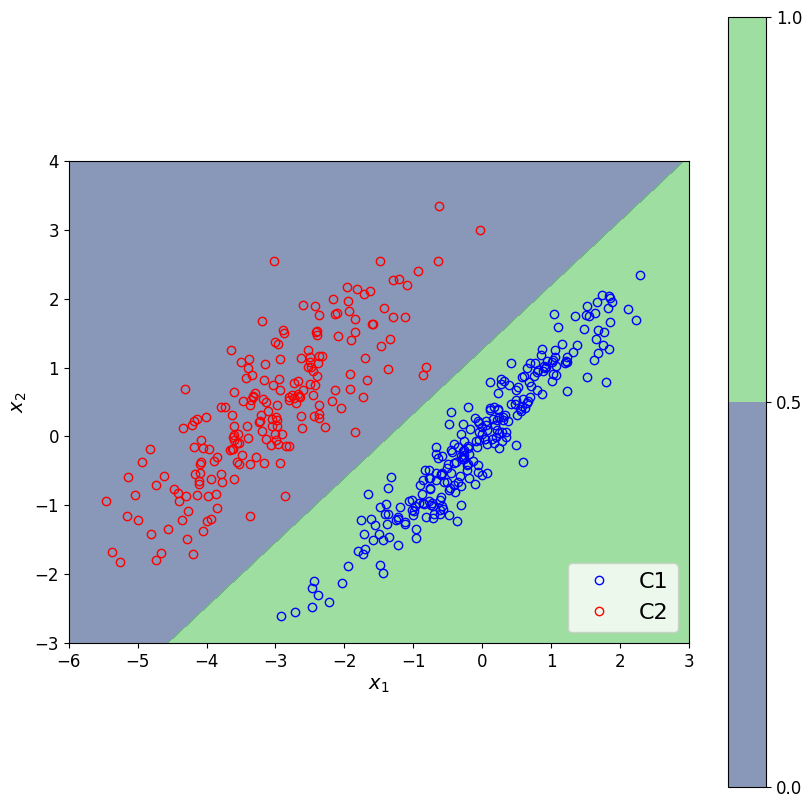

In [87]:
x1 = np.linspace(-6.0,3.0,100)
x2 = np.linspace(-3.0,4.0,100)

#X1toplot,X2toplot=np.meshgrid(x1,x2)
#plt.xlim(0.0,0.2)
#plt.ylim(0.0,0.2)
#Z=(np.asarray([expit(np.dot(W.T,[1.0,el[0],el[1]])) for el in np.c_[X1toplot.ravel(), X2toplot.ravel()]])).reshape(X1toplot.shape)

Z = np.zeros((len(x2),len(x1)))
for x2_ind, x2_val in enumerate(x2):
  for x1_ind, x1_val in enumerate(x1):
    Z[x2_ind,x1_ind] = sigmoid(np.dot(W.T,[1.0,x1_val,x2_val]))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')
contour = ax.contourf(x1,x2,Z,levels=[0.0,0.5,1.0],alpha=0.6)
plt.colorbar(contour,ax=ax)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

En este codigo, podemos agregar más valores a los níveles del gráfico para tener una idea de la forma del posterior.

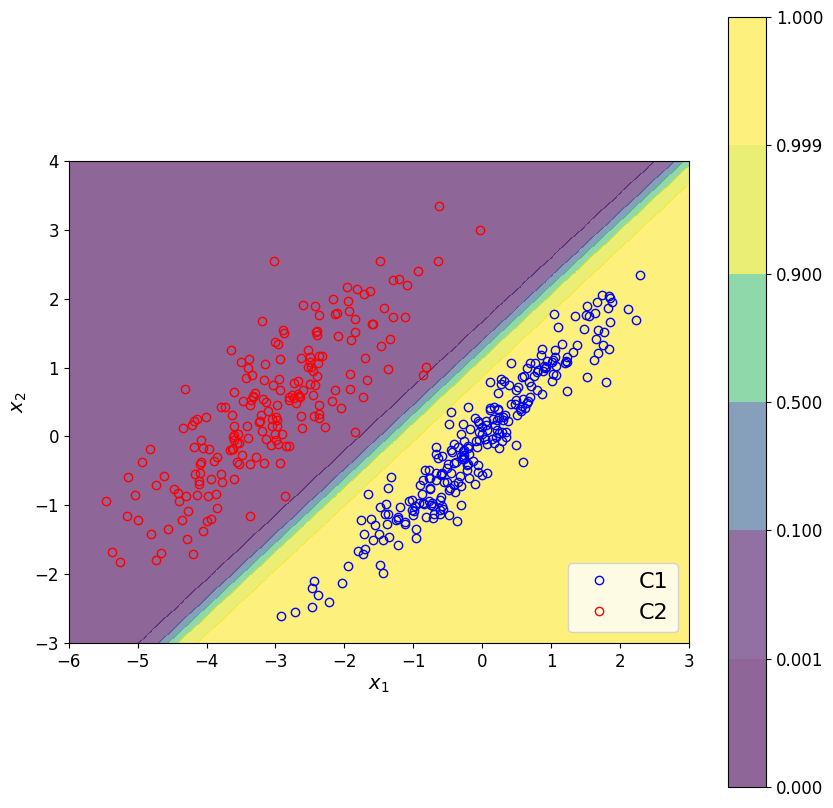

In [89]:
x1 = np.linspace(-6.0,3.0,100)
x2 = np.linspace(-3.0,4.0,100)
X1toplot, X2toplot = np.meshgrid(x1,x2)
#plt.xlim(0.0,0.2)
#plt.ylim(0.0,0.2)
Z=(np.asarray([sigmoid(np.dot(W.T,[1.0,el[0],el[1]])) for el in np.c_[X1toplot.ravel(), X2toplot.ravel()]])).reshape(X1toplot.shape)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')
contour = ax.contourf(X1toplot,X2toplot,Z,levels=[0.0,0.001,0.1,0.5,0.9,0.999,1.0],alpha=0.6)
plt.colorbar(contour,ax=ax)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

In [ ]:
class LogisticRegression:

    def init

    def fit:
        
    def predict:
        return 
    def predict_proba:
        return 

### Caso no linealmente separable

In [91]:
size1 = 250
mu1 = [0, 0]
cov1 = [[1, 0.95],[0.95, 1]]

size2 = 200
mu2 = [-1.5, 0.5]
cov2 = [[1, 0.8],[0.8, 1]]

np.random.seed(20200922)
# Sample classes
xc1 = np.random.multivariate_normal(mean=mu1, cov=cov1,size=size1).T
xc2 = np.random.multivariate_normal(mean=mu2, cov=cov2,size=size2).T

print(xc1.shape, xc2.shape)

(2, 250) (2, 200)


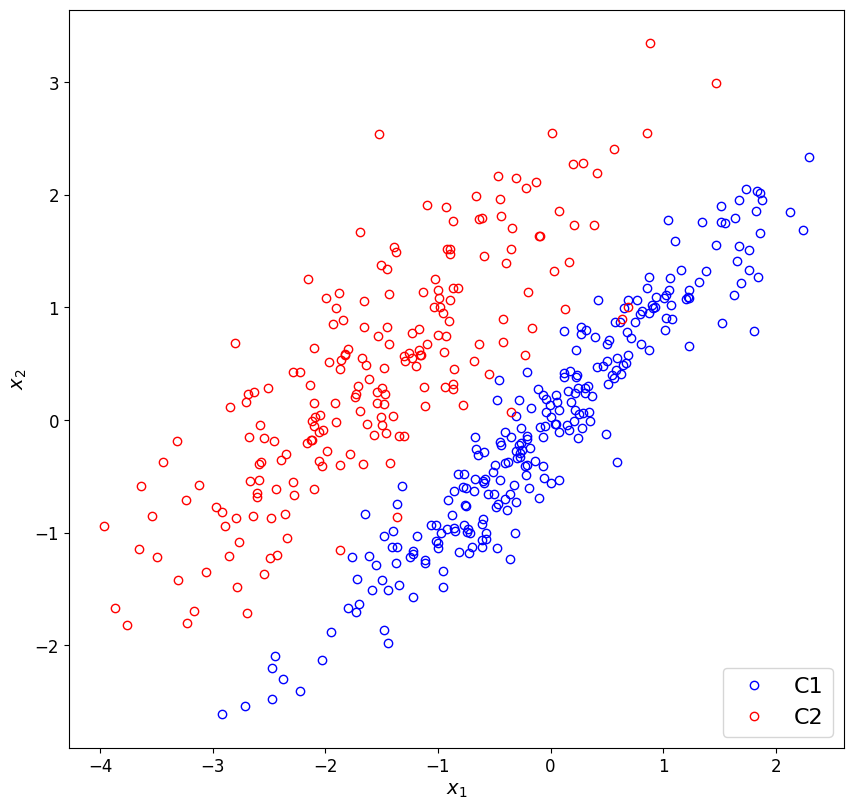

In [92]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(*xc1, 'ob', mfc='None', label='C1')
ax.plot(*xc2, 'or', mfc='None', label='C2')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right', fontsize=16)
ax.set_aspect('equal')

### Multiclass (`sklearn`-based)

A lo largo de las últimas clases, nos encontramos varias veces con que hay ciertas ambigüedades al pasar de 2 clases a K clases, con K mayor que 2. Repasemos entonces un poco las diferencias entre el caso binario y el caso multiclase y veamos que podemos hacer al respecto.

Vayamos primero al caso binario:
- Tenemos las etiquetas, que pueden venir de varias formas: {0,1},{-1,1},{[1,0],[0,1]}. Para `sklearn`, con usar la primera estamos perfecto. Si codeamos a mano, hay que tener cuidado.
- Tenemos las predicciones. Para el caso binario, sólo necesito 1 número para asignar la clase. Este número puede ser una función discriminante $y$ (por ejemplo el Perceptron o el SVC) o una probabilidad $p(C_{1}|x)$ (Regresión Logística, Naive Bayes). Noten que sólo necesitamos $p(C_{1}|x)$ porque, al tener únicamente dos clases, $p(C_{2}|x)=1-p(C_{1}|x)$.
- Para el caso binario necesitamos entonces aprender **una sola función**. Aparece entonces la frontera de decisión

Ejemplifiquemos con un caso de juguete:

In [2]:
from sklearn.datasets import make_blobs

gt_center = np.array([[2.0, 2.0],[-2.0, -2.0]])
X, t = make_blobs(1000, n_features=2, centers=gt_center, cluster_std=1.5, random_state=1234, )

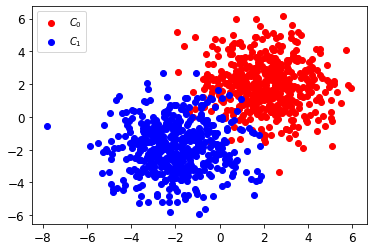

In [3]:
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.legend(loc='upper left')

Entrenemos una función discriminante y un modelo discriminativo:

In [4]:
from sklearn.linear_model import LogisticRegression, Perceptron
lr = LogisticRegression()
percep = Perceptron()

In [5]:
lr.fit(X,t)
percep.fit(X,t)

Perceptron()

Para el caso del Perceptron, tendremos una única función de decisión. El criterio usual es que si $y\geq0$, asigno a la clase $C_{1}$. Esto se puede modificar tal como vimos antes.

In [7]:
print(percep.decision_function(X[:1]))

[4.95109495]


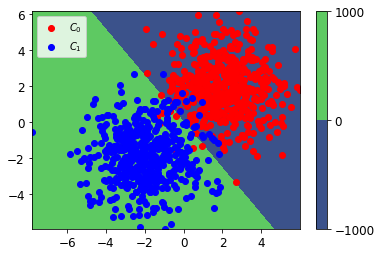

In [8]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = percep.decision_function(Xvals).reshape(X1.shape)
plt.contourf(X1,X2,Z,levels=[-1000,0.0,1000])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.legend(loc='upper left')

Mientras que para el Regresor Logístico tendremos dos probabilidades que suman uno, por lo que puedo quedarme únicamente con la segunda columna. El criterio por defecto es poner el umbral en $p(C_{1}|x)\geq 0.5$.

In [9]:
print(lr.predict_proba(X[:1]))

[[0.06538928 0.93461072]]


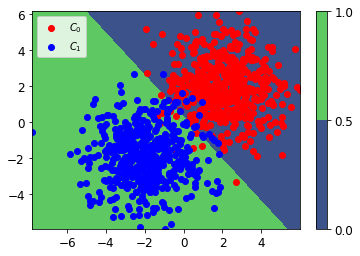

In [10]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = lr.predict_proba(Xvals)[:,1].reshape(X1.shape)
plt.contourf(X1,X2,Z,levels=[0.0,0.5,1.0])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.legend(loc='upper left')

Vayamos ahora al caso multiclase:
- Tenemos las etiquetas, que pueden venir esencialmente en dos formas: {0,1,...,K-1},{[1,0,...,0],[0,1,0,...,0],...}. Para `sklearn`, con usar la primera estamos perfecto. Si codeamos a mano, hay que tener cuidado.
- Tenemos las predicciones. Acá es donde aparece la gran diferencia. ¿Qué entrenamos? 
- El primer enfoque es el de _uno contra el resto_. Para cada clase $K$, entreno un clasificador que aprenda a distinguir esa clase del resto. Tenemos entonces K clasificadores. Por ejemplo, para 4 clases: (0,123), (1,023), (2,013), (3,012). Uno asigna entonces una clase viendo como se intersectan las distintas regiones de los clasificadores. Eso introduce la posibilidad de regiones ambiguas. Además, el problema se puede volver muy desbalanceado. 
- El segundo enfoque es el de _uno contra uno_. En este enfoque, entreno un clasificador para cada combinación de dos clases. Tenemos entonces $\frac{K(K-1)}{2}$ clasificadores, uno por cada problema de dos clases. Por ejemplo, para 4 clases: (0,1), (0,2), (0,3), (1,2), (1,3), (2,3). Para asignar una clase, tomamos entonces el voto mayoritario. Es decir, cual es la clase que recibe más votos de cada uno de estos clasificadores. Esto también introduce ambigüedades.
- El tercer enfoque, que no asigna ambiguedades. Es aprender un único clasificador de $K$ clases. Para el caso de función discriminante, esto se logra aprendiendo K funciones $y_{k}$ al mismo tiempo, y asignando la clase como la que da el maximo $y_{k}$ entre todos. Las fronteras de decisión son entonces dadas por las regiones donde coinciden dos funciones. Se puede mostrar que con este criterio ya no hay ambigüedades. Para el caso de modelos discriminativos y generativos, esto es todavia más fácil. ¡Aprendemos $p(C_{k}|x)$ tal como antes! Ahora simplemente no simplificamos la clase redundante. Tampoco hay ambigüedades.

Cual de los tres enfoques usamos depende del algoritmo. En particular, hay algunos que no pueden utilizar el tercer enfoque y entonces aparece el problema. Noten que ahora escribi el criterio, mientras que antes siempre aclare que podiamos jugar con el umbral. Para el caso multiclase, el análisis que hicimos se vuelve más díficil. Para poder hacerlo, vamos a binarizar el problema.

Ejemplifiquemos con un caso de juguete:

In [11]:
from sklearn.datasets import make_blobs

gt_center = np.array([[3.0, 3.0],[-3.0, -3.0],[-3.0,3.0],[3.0,-3.0]])
X, t = make_blobs(1000, n_features=2, centers=gt_center, cluster_std=1.0, random_state=1234, )

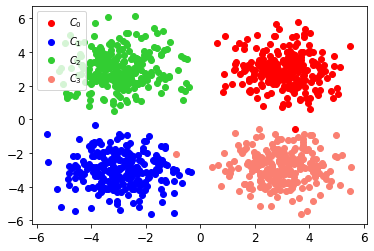

In [12]:
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')

plt.legend(loc='upper left')

Entrenemos una función discriminante y un modelo discriminativo:

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lr = LogisticRegression()
lda = LinearDiscriminantAnalysis(solver='lsqr')

In [14]:
lr.fit(X,t)
lda.fit(X,t)

LinearDiscriminantAnalysis(solver='lsqr')

Para el caso del LinearDiscriminantAnalysis, tendremos ahora cuatro funciones de decisión. 

In [15]:
print(lda.decision_function(X[:1]))

[[ -3.13427549 -18.79619805  -8.21778037 -11.90111461]]


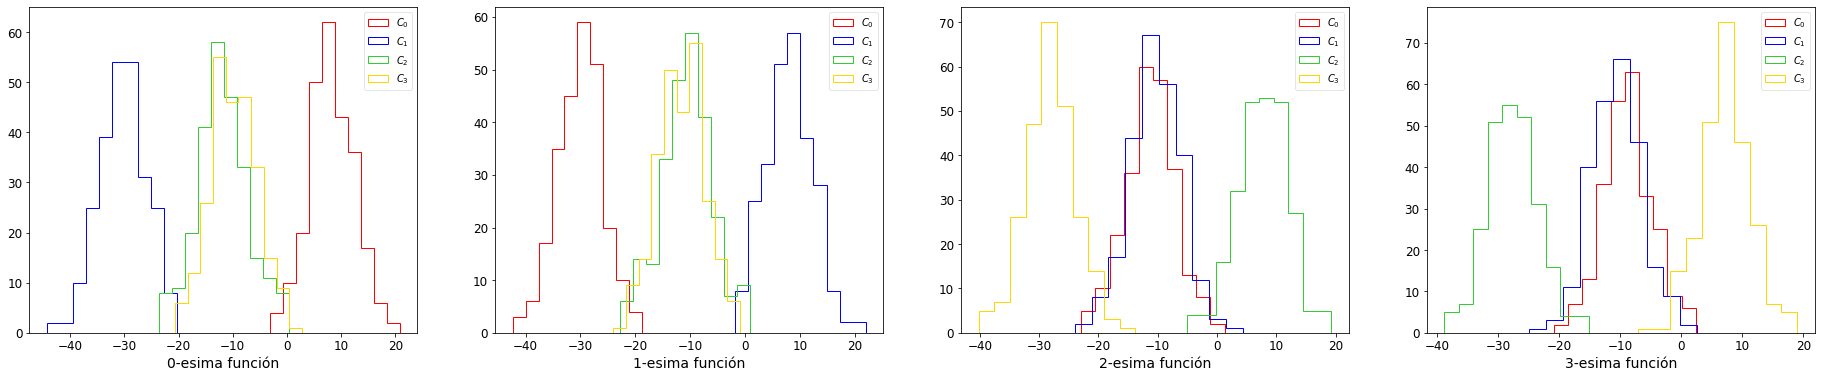

In [16]:
fig, ax = plt.subplots(1,4,figsize=(4*2*4,2*3))
for k in range(4):
    ax[k].hist(lda.decision_function(X)[t==0,k],histtype='step',color='red',label='$C_{0}$')
    ax[k].hist(lda.decision_function(X)[t==1,k],histtype='step',color='blue',label='$C_{1}$')
    ax[k].hist(lda.decision_function(X)[t==2,k],histtype='step',color='limegreen',label='$C_{2}$')
    ax[k].hist(lda.decision_function(X)[t==3,k],histtype='step',color='gold',label='$C_{3}$')
    ax[k].set_xlabel(str(k)+'-esima función')
    ax[k].legend(loc='upper right',framealpha=0.5)

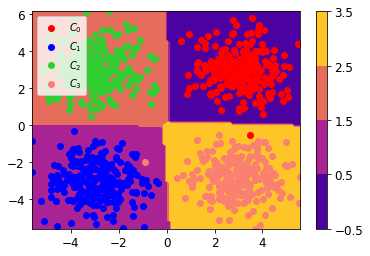

In [17]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = np.argmax(lda.decision_function(Xvals),axis=1).reshape(X1.shape)
plt.contourf(X1,X2,Z,cmap='plasma',levels=[-0.5,0.5,1.5,2.5,3.5])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.legend(loc='upper left')

Mientras que para el Regresor Logístico tendremos cuatro probabilidades que suman uno.

In [21]:
print(lr.predict_proba(X[:1]))

[[8.75343203e-01 9.87611271e-05 1.09991086e-01 1.45669498e-02]]


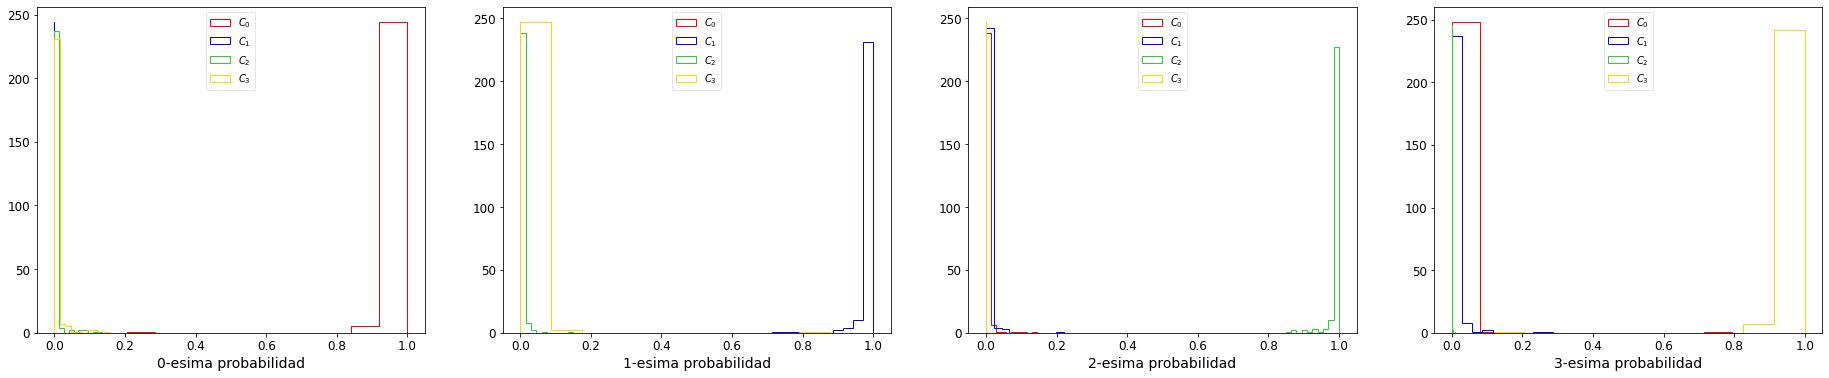

In [23]:
fig, ax = plt.subplots(1,4,figsize=(4*2*4,2*3))
for k in range(4):
    ax[k].hist(lr.predict_proba(X)[t==0,k],histtype='step',color='red',label='$C_{0}$')
    ax[k].hist(lr.predict_proba(X)[t==1,k],histtype='step',color='blue',label='$C_{1}$')
    ax[k].hist(lr.predict_proba(X)[t==2,k],histtype='step',color='limegreen',label='$C_{2}$')
    ax[k].hist(lr.predict_proba(X)[t==3,k],histtype='step',color='gold',label='$C_{3}$')
    ax[k].set_xlabel(str(k)+'-esima probabilidad')
    ax[k].legend(loc='upper center',framealpha=0.5)

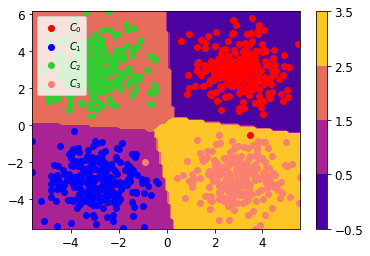

In [24]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = np.argmax(lr.predict_proba(Xvals),axis=1).reshape(X1.shape)
plt.contourf(X1,X2,Z,cmap='plasma',levels=[-0.5,0.5,1.5,2.5,3.5])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.legend(loc='upper left')

En general, vamos a utilizar algoritmos que tengan el tercer enfoque para el problema multiclase. En ese caso, nos quedamos tranquilos de que tenemos una asignación clara basada en el criterio de maximización de función discrimiante / probabilidad posterior. Podemos construir las matriz de confusión y calcular la accuracy:

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(t,lr.predict(X)))
print(accuracy_score(t,lr.predict(X)))

[[249   0   0   1]
 [  0 250   0   0]
 [  0   0 250   0]
 [  0   1   0 249]]
0.998


Si queremos ver otras métricas nos encontramos con que están diseñadas para el caso binario. Una posibilidad es binarizar de antemano y entrenar un clasificador binario en efecto reduciendo el problema a alguno de los otros dos enfoques (como hicimos el Martes pasado!). Otra es aprovechar este clasificador entrenado a full y tomar simplemente distintos positivos y negativos. El gran problema viene si queremos mover el umbral. Las asignaciones se toman en cuenta tomando el máximo, por lo que el valor relativo es importante, no el absoluto. Eso conspira para que el analogo a mover el umbral en el caso binario no sea trivial.

In [28]:
from sklearn.metrics import precision_score, f1_score
for k in range(4):
    print('Clase '+str(k)+' contra todos')
    print(f1_score(np.where(t==k,1.0,0.0),np.where(lr.predict(X)==k,1.0,0.0)))

Clase 0 contra todos
0.9979959919839679
Clase 1 contra todos
0.998003992015968
Clase 2 contra todos
1.0
Clase 3 contra todos
0.996


Sin embargo, hay algoritmos que, en `sklearn`, no tienen incorporado este tercer criterio. Por ejemplo, el `Perceptron`, utiliza el _Uno contra todos_.

La clase pasada vimos las SVM. Para este algoritmo tampoco puede utilizarse fácilmente el buen enfoque ya que esta muy pensado para el caso binario. SVC tiene que elegir entonces entre los dos enfoques imperfectos. Por lo tanto, hace lo siguiente:
- `LinearSVC` resuelve el problema usando _uno contra todos_.  Se puede utilizar tambien el criterio `crammer_singer` que es parecido al tercer enfoque.
- `SVC` resuelve el problema usando _uno contra uno_. Sin embargo, y por compatibilidad, reporta la función de decisión como _uno contra todos_. Uno puede transformarla la función de decisión a _uno contra uno_ sin prolbema.

In [29]:
from sklearn.svm import LinearSVC, SVC
lsvc_1 = LinearSVC(loss='hinge', penalty='l2',C=10.0,max_iter=1000)
svc_1 = SVC(kernel='linear', C=10.0,decision_function_shape='ovr')
svc_2 = SVC(kernel='linear', C=10.0,decision_function_shape='ovo')

In [30]:
lsvc_1.fit(X,t)
svc_1.fit(X,t)
svc_2.fit(X,t)

/home/manuel/jupyter/jupyterenvironment/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVC(C=10.0, decision_function_shape='ovo', kernel='linear')

In [34]:
print(lsvc_1.decision_function(X[:1]).shape)
print(svc_1.decision_function(X[:1]).shape)
print(svc_2.decision_function(X[:1]).shape)

(1, 4)
(1, 4)
(1, 6)


Como estoy con `kernel=linear` puedo ver los coeficientes.

In [35]:
print(lsvc_1.coef_.shape) # (nclasses, ncoefs)
print(svc_1.coef_.shape) # (nclasses*(nclasses-1)/2, ncoefs)
print(svc_2.coef_.shape) # (nclasses*(nclasses-1)/2, ncoefs)

(4, 2)
(6, 2)
(6, 2)


En efecto, la forma de la función de decisión no cambia como aprende. Eso es siempre 'ovo'. El orden es de 0 a K-1 con “0 vs 1”, “0 vs 2” , … “0 vs K-1”, “1 vs 2”, “1 vs 3”, “1 vs K-1”, . . . “K-2 vs K-1”

In [196]:
print(np.allclose(svc_1.coef_,svc_2.coef_)) 

True


In [187]:
print(lsvc_1.decision_function(X[:1]),len(lsvc_1.decision_function(X[:1])[0]))
print(lsvc_1.predict(X[:1]))
print(svc_1.decision_function(X[:1]),len(svc_1.decision_function(X[:1])[0]))
print(svc_1.predict(X[:1]))
print(svc_2.decision_function(X[:1]),len(svc_2.decision_function(X[:1])[0]))
print(svc_2.predict(X[:1]))

[[ -1.76942724 -11.6022257   -3.53458947  -5.49358822]] 4
[0]
[[ 3.26875807 -0.31485508  2.28228002  1.29340438]] 4
[0]
[[  1.00000237   0.99979827   2.16213468  -5.73964319 -10.29957355
    0.78927807]] 6
[0]


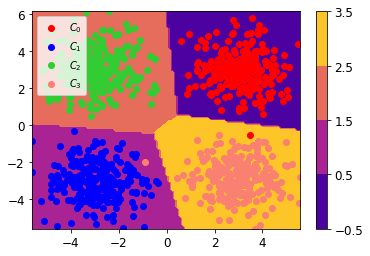

In [36]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = lsvc_1.predict(Xvals).reshape(X1.shape)
plt.contourf(X1,X2,Z,cmap='plasma',levels=[-0.5,0.5,1.5,2.5,3.5])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.legend(loc='upper left')

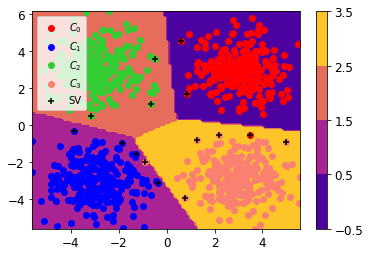

In [241]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = svc_1.predict(Xvals).reshape(X1.shape)
plt.contourf(X1,X2,Z,cmap='plasma',levels=[-0.5,0.5,1.5,2.5,3.5])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.scatter(svc_1.support_vectors_[:,0],svc_1.support_vectors_[:,1],marker='+',color='black',label='SV')
plt.legend(loc='upper left')

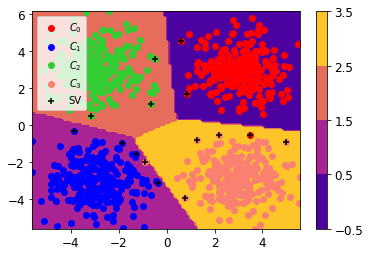

In [38]:
x1vals = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2vals = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = svc_2.predict(Xvals).reshape(X1.shape)
plt.contourf(X1,X2,Z,cmap='plasma',levels=[-0.5,0.5,1.5,2.5,3.5])
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.scatter(svc_2.support_vectors_[:,0],svc_2.support_vectors_[:,1],marker='+',color='black',label='SV')

plt.legend(loc='upper left')

## Clustering

In [4]:
from sklearn.datasets import make_blobs

gt_center = np.array([[3.0, 3.0],[-3.0, -3.0],[-3.0,3.0],[3.0,-3.0]])
X, t = make_blobs(1000, n_features=2, centers=gt_center, cluster_std=1.0, random_state=1234, )

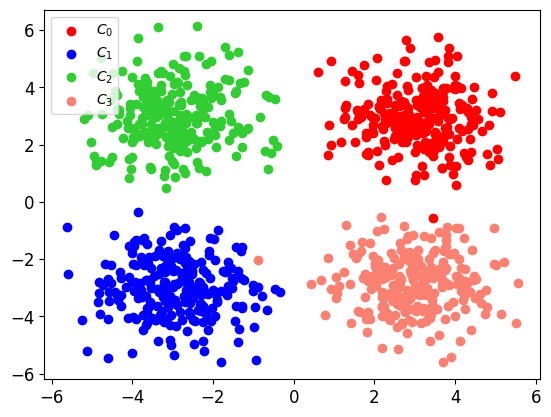

In [5]:
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')

plt.legend(loc='upper left')

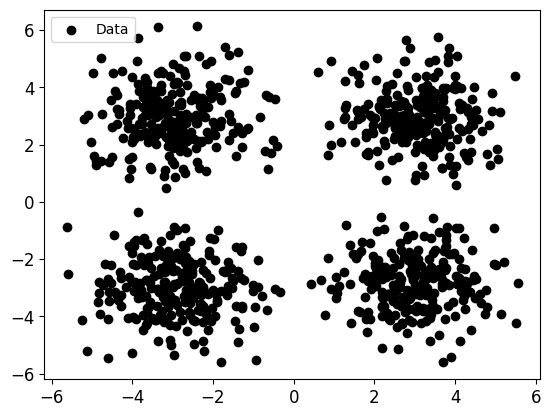

In [6]:

plt.scatter(X[:,0],X[:,1],c='black', label='Data')

plt.legend(loc='upper left')

In [60]:
class KMeansClustering():

    def __init__(self,nclasses=2,ndim=2,scale_init=5,mean_init=0,seed=42):
        np.random.seed(seed)
        self.nclasses = nclasses
        self.ndim = ndim
        self.means = mean_init+scale_init*np.random.randn(nclasses,ndim)

    def fit(self,X,nepochs=10,min_change=0.01):
        for nepoch in range(nepochs):
            indexes = self.class_assigner(X)
            for nclass in range(self.nclasses):
                self.means[nclass] = np.sum(X[indexes==nclass],0)/np.sum(indexes==nclass)
        return self

    def class_assigner(self,X):
        distances = np.sum((X[:,np.newaxis]-self.means[np.newaxis])**2,2) 
        indexes=np.argmin(distances,1)
        return indexes

In [67]:
clusterer = KMeansClustering(nclasses=4,seed=42)
clusterer.fit(X)
labels = clusterer.class_assigner(X)

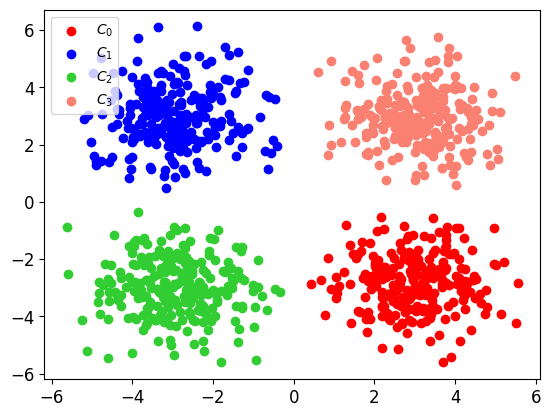

In [68]:
plt.scatter(X[labels==0,0],X[labels==0,1],c='red', label='$C_{0}$')
plt.scatter(X[labels==1,0],X[labels==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[labels==2,0],X[labels==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[labels==3,0],X[labels==3,1],c='salmon', label='$C_{3}$')

plt.legend(loc='upper left')

#### Jet Clustering

## Density Estimation

Gaussian mixture

In [78]:
from sklearn.datasets import make_blobs

gt_center = np.array([[3.0, 3.0],[-3.0, -3.0],[-3.0,3.0],[3.0,-3.0]])
X, t = make_blobs(1000, n_features=2, centers=gt_center, cluster_std=1.0, random_state=1234, )

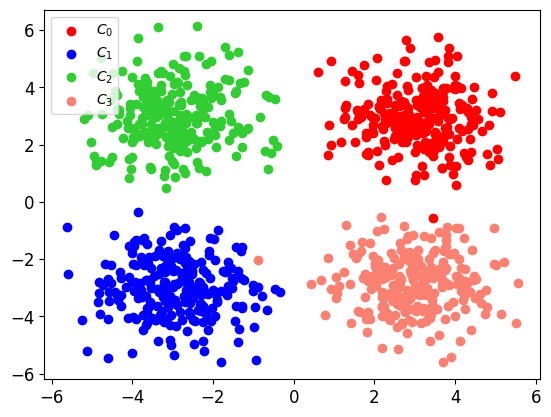

In [79]:
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')

plt.legend(loc='upper left')

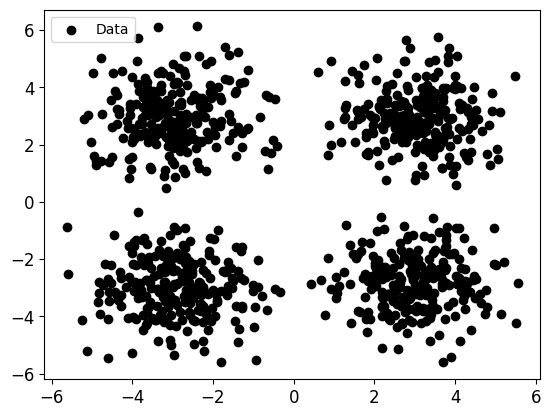

In [80]:

plt.scatter(X[:,0],X[:,1],c='black', label='Data')

plt.legend(loc='upper left')

In [267]:
class GaussianMixtureModel():

    def __init__(self,nclasses=2,ndim=2,scale_init=5,mean_init=0,epsilon=1e-10,seed=42):
        np.random.seed(seed)
        self.nclasses = nclasses
        self.ndim = ndim
        self.w = np.ones(self.nclasses) / self.nclasses
        self.means = mean_init+scale_init*np.random.randn(nclasses,ndim)
        self.covs = np.array([np.eye(self.ndim) for _ in range(self.nclasses)])
        self.precision_matrix = np.array([np.eye(self.ndim) for _ in range(self.nclasses)])
        self.epsilon = epsilon*np.array([np.eye(self.ndim) for _ in range(self.nclasses)])

    def fit(self,X,nepochs=10,min_change=0.01):
        log_likelihood = self.log_likelihood(X)
        for nepoch in range(nepochs):
            probas = self.E_step(X)
            self.M_step(X,probas)
            self.precision_matrix = np.linalg.inv(self.covs+self.epsilon)
            log_likelihood_new = self.log_likelihood(X)
            # if log_likelihood_new < (1.0+min_change)*log_likelihood:
            #     break
            log_likelihood = log_likelihood_new
        # print(nepoch)
        return self

    def predict_proba(self,X):
        ### get likelihoods
        likelihood = self.gaussian_likelihood(X)
        ### reweight using weights
        weighted_likelihood=np.einsum('nk, k -> nk',likelihood,self.w)
        ### normalize 
        probas = np.einsum('nk,n -> nk',weighted_likelihood,1/np.sum(weighted_likelihood,1))
        return probas

    def predict(self,X):
        ### get likelihoods
        likelihood = self.gaussian_likelihood(X)
        ### reweight using weights
        weighted_likelihood=np.einsum('nk, k -> nk',likelihood,self.w)
        ### normalize 
        probas = np.einsum('nk,n -> nk',weighted_likelihood,1/np.sum(weighted_likelihood,1))
        return np.argmin(probas,1)
        
    def gaussian_likelihood(self,X):
        ### distance vector is NxKxD
        distance_vector = X[:,np.newaxis]-self.means[np.newaxis]
        ### weighted distance for denominator, now it's NxK
        weighted_distance = np.einsum('nki, kij, nkj -> nk',distance_vector,self.precision_matrix,distance_vector)
        ### likelihood per event per class
        likelihood = np.einsum('k,nk -> nk',(np.power(2*np.pi,-self.ndim/2))*(1.0/np.sqrt(np.linalg.det(self.covs))),np.exp(-0.5*weighted_distance))
        return likelihood
        
    def E_step(self,X):
        probas = self.predict_proba(X)
        return probas

    def M_step(self,X,probas):
        Nk = np.sum(probas,0)
        self.w = Nk/len(X)
        self.means = np.einsum('nk, nd, k -> kd',probas,X,1/Nk)
        distance_vector = X[:,np.newaxis]-self.means[np.newaxis]
        self.covs = np.einsum('nk, nki, nkj, k -> kij',probas,distance_vector,distance_vector,1/Nk)
        return self

    def log_likelihood(self,X):
        ### get likelihoods
        likelihood = self.gaussian_likelihood(X)
        ### reweight using weights
        weighted_likelihood=np.einsum('nk, k -> nk',likelihood,self.w)
        return np.sum(np.log(np.sum(weighted_likelihood,1)))

In [268]:
gmm = GaussianMixtureModel(nclasses=4,ndim=2,seed=156)

In [269]:
gmm.means.shape,gmm.covs.shape

((4, 2), (4, 2, 2))

In [271]:
gmm.predict(X)

array([0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 3, 0,
       0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 2, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2,
       0, 2, 2, 1, 3, 1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 3, 0, 2, 0, 0, 0, 1, 0, 2, 0,
       2, 2, 2, 2, 3, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [272]:
gmm.log_likelihood(X)

-9851.561006598913

In [273]:
gmm.fit(X,nepochs=100,min_change=1)

In [274]:
gmm.w

array([0.02681068, 0.50072355, 0.22337231, 0.24909345])

In [275]:
gmm.means

array([[ 2.44231802, -3.11573824],
       [-2.95089112, -0.00655364],
       [ 3.03815915, -2.79447954],
       [ 3.05809789,  2.9717204 ]])

In [276]:
gmm.covs[0]

array([[ 0.37627211, -0.61557352],
       [-0.61557352,  1.12362035]])

In [277]:
gmm.precision_matrix[0]

array([[25.62053848, 14.03616895],
       [14.03616895,  8.57967189]])

In [278]:
probas = gmm.predict_proba(X)
labels = np.argmin(probas,1)

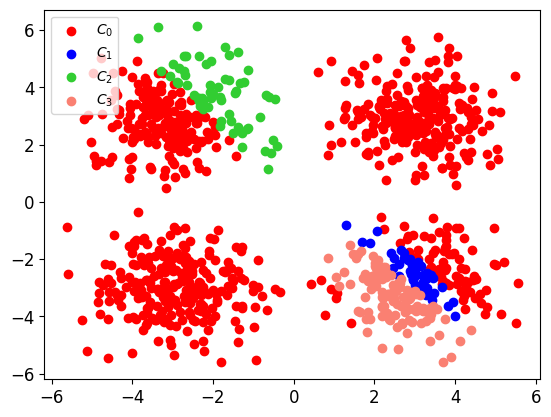

In [279]:
plt.scatter(X[labels==0,0],X[labels==0,1],c='red', label='$C_{0}$')
plt.scatter(X[labels==1,0],X[labels==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[labels==2,0],X[labels==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[labels==3,0],X[labels==3,1],c='salmon', label='$C_{3}$')

plt.legend(loc='upper left')

Seed dependence

In [280]:
nmodels = 100
log_likelihoods = np.zeros(nmodels)
seeds = np.zeros(nmodels)
nmodel = 0
nmodel_accepted = 0
while nmodel_accepted < nmodels:
    gmm = GaussianMixtureModel(nclasses=4,ndim=2,seed=nmodel)
    gmm.fit(X,nepochs=100)
    log_likelihood = gmm.log_likelihood(X)
    if np.isnan(log_likelihood) == False:
        log_likelihoods[nmodel_accepted]=log_likelihood
        seeds[nmodel_accepted]=nmodel
        nmodel_accepted+=1
        nmodel+=1
    else:
        nmodel+=1

/tmp/ipykernel_140356/3200863874.py:50: RuntimeWarning: divide by zero encountered in divide
  likelihood = np.einsum('k,nk -> nk',(np.power(2*np.pi,-self.ndim/2))*(1.0/np.sqrt(np.linalg.det(self.covs))),np.exp(-0.5*weighted_distance))
/tmp/ipykernel_140356/3200863874.py:50: RuntimeWarning: invalid value encountered in sqrt
  likelihood = np.einsum('k,nk -> nk',(np.power(2*np.pi,-self.ndim/2))*(1.0/np.sqrt(np.linalg.det(self.covs))),np.exp(-0.5*weighted_distance))


In [281]:
np.isnan(log_likelihoods[0])

False

(array([ 1.,  0.,  0., 15., 16.,  0.,  0.,  0.,  0., 68.]),
 array([-4546.99792225, -4509.30393484, -4471.60994744, -4433.91596003,
        -4396.22197263, -4358.52798523, -4320.83399782, -4283.14001042,
        -4245.44602302, -4207.75203561, -4170.05804821]),
 <BarContainer object of 10 artists>)

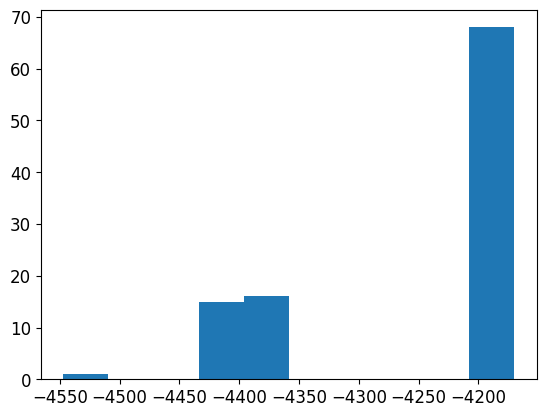

In [282]:
plt.hist(log_likelihoods)

In [283]:
np.argmax(log_likelihoods)

0

In [284]:
best_model = GaussianMixtureModel(nclasses=4,ndim=2,seed=int(seeds[np.argmax(log_likelihoods)]))
best_model.fit(X,nepochs=100)

In [285]:
best_model.w, best_model.means, best_model.covs

(array([0.24993551, 0.2501922 , 0.25085067, 0.24902161]),
 array([[ 2.97754719, -2.82836043],
        [-2.97164716,  3.00987586],
        [-2.92661263, -3.01743046],
        [ 3.05886396,  2.97160878]]),
 array([[[ 0.90949568,  0.00462763],
         [ 0.00462763,  0.9081273 ]],
 
        [[ 0.94941871,  0.04034079],
         [ 0.04034079,  1.11561005]],
 
        [[ 0.9997179 , -0.05429475],
         [-0.05429475,  0.95783466]],
 
        [[ 0.84129669, -0.04968167],
         [-0.04968167,  0.95664935]]]))

In [286]:
probas = best_model.predict_proba(X)
labels = np.argmin(probas,1)

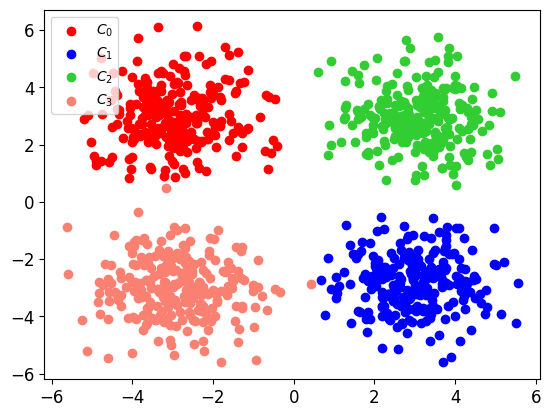

In [287]:
plt.scatter(X[labels==0,0],X[labels==0,1],c='red', label='$C_{0}$')
plt.scatter(X[labels==1,0],X[labels==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[labels==2,0],X[labels==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[labels==3,0],X[labels==3,1],c='salmon', label='$C_{3}$')

plt.legend(loc='upper left')

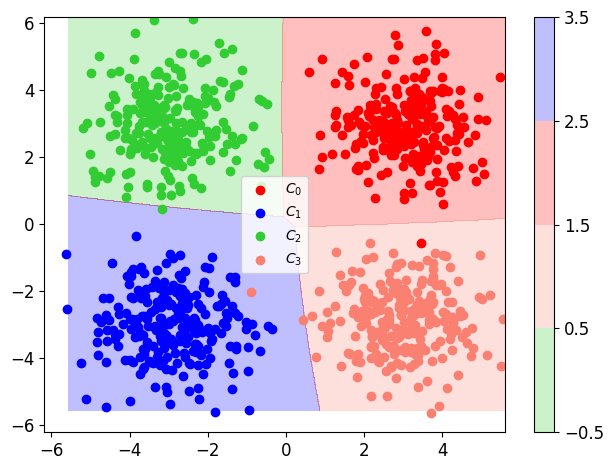

In [300]:
x1vals = np.linspace(0.99*np.min(X[:,0]),1.01*np.max(X[:,0]),1000)
x2vals = np.linspace(0.99*np.min(X[:,1]),1.01*np.max(X[:,1]),1000)
X1, X2 = np.meshgrid(x1vals,x2vals)
Xvals = np.array([X1.ravel(),X2.ravel()]).T
Z = best_model.predict(Xvals).reshape(X1.shape)
plt.contourf(X1,X2,Z,colors=['limegreen','salmon','red','blue'],levels=[-0.5,0.5,1.5,2.5,3.5],alpha=0.25)
plt.colorbar()
plt.scatter(X[t==0,0],X[t==0,1],c='red', label='$C_{0}$')
plt.scatter(X[t==1,0],X[t==1,1],c='blue', label='$C_{1}$')
plt.scatter(X[t==2,0],X[t==2,1],c='limegreen', label='$C_{2}$')
plt.scatter(X[t==3,0],X[t==3,1],c='salmon', label='$C_{3}$')
plt.tight_layout()
plt.legend(loc='center')